# Exercise 1: Supervised learning / Regression

## Learning outcomes:
 - Machine learning methods for regression
     - Linear regression
     - Non-linear regression
     - Multivariate regression
     - Neural networks
 - Model selection
 - Error / cost
 - Feature selection
 - (Data)
 - Machine learning open source tools:
     - Keras, SciKit-Learn, Jupyter Notebooks, Matplotlib

## Structure
1. Linear regression
    1. Manually fit a model to data
    2. Use iterative algorithm to learn a model
2. Non-linear regression
    1. Underfitting a model
    2. Overfitting a model
    3. Model selection
3. Multivariate regression
    1. 
4. Neural networks

## Dataset: Boston house price predicion

In [1]:
from sklearn.datasets import load_boston

# Load data
boston = load_boston()

print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

## Load Open Source Machine Learning Libraries

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np
import pylab
%matplotlib inline

In [3]:
pylab.rcParams['figure.figsize'] = [12.0, 8.0]

## Load Keras, one of the most popular Open Source Deep Learning library

In [4]:
# Keras is an easy to use Deep Learning library for Python
import keras

from keras import backend as K

# Load Sequential model architecture
from keras.models import Sequential

# Load Dense and Dropout layers ?
from keras.layers import Dense, Dropout

# Load RMSprop optimizer to minimize cost to train the network
from keras.optimizers import SGD, RMSprop, Adam

Using TensorFlow backend.
/Users/tkin/wrk/analytics_weekly/ml-crash-course/mlenv/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


## Loading data

In [5]:
from sklearn.datasets import load_boston

# Load data
boston = load_boston()

# Choose AVG number of rooms as feature
X = boston.data[:, boston.feature_names.tolist().index('RM')]

# Target / desired output
y = boston.target

## Visualising data
It is a good idea to visualise the data before running any machine learning algorithms to see if the data makes any sense and if it is possible to learn from the data.

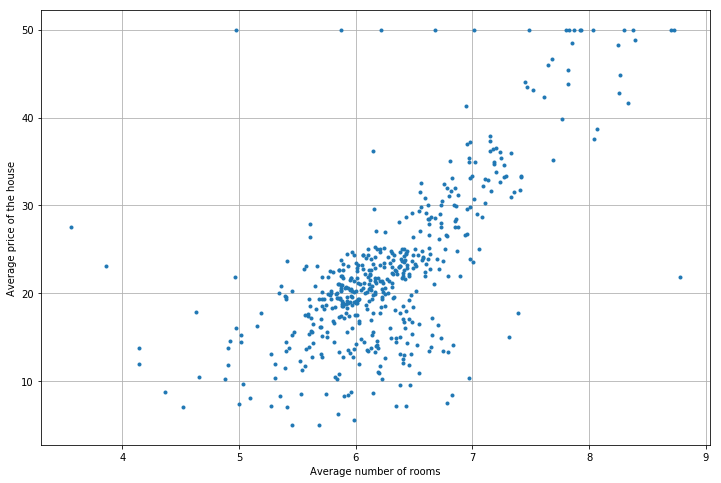

In [6]:
pylab.plot(X, y, '.')
pylab.grid()
pylab.xlabel('Average number of rooms')
pylab.ylabel('Average price of the house')
pylab.savefig('house_num_rooms_vs_price.png')

## Exercise 1.1: Manually fitting a model

In [7]:
# Splits the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Our simple linear model
def predict(x, w, b):
    return w*x + b

In [9]:
# Init weight and bias
w = 1
b = 0

In [10]:
y_pred = predict(x_train, w, b)

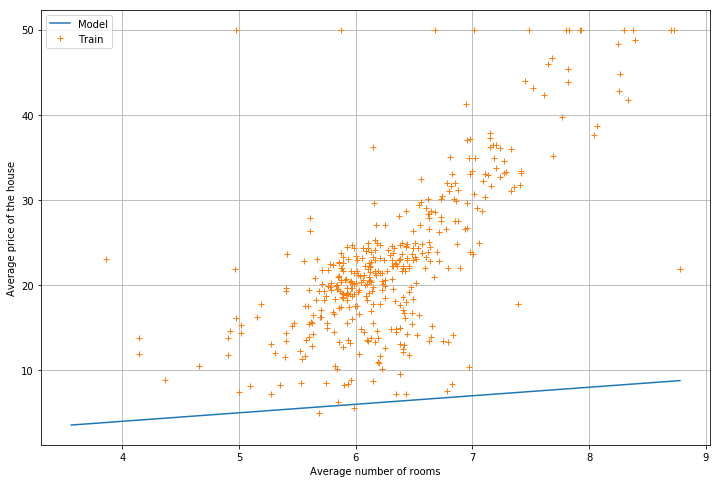

In [11]:
pylab.figure()
xs = np.linspace(X.min(), X.max(), 100)
pylab.plot(xs, predict(xs, w, b))
pylab.plot(x_train, y_train, '+')
#pylab.plot(x_test, y_test, '.')
pylab.xlabel('Average number of rooms')
pylab.ylabel('Average price of the house')
pylab.legend(['Model', 'Train', 'Test'])
pylab.grid()

### Visualising error function
Error function shows how the weight *w* affects the error. Notice that we did not study bias term *b* in the sake of simplicity.

Text(0,0.5,'Cost: Mean squared error')

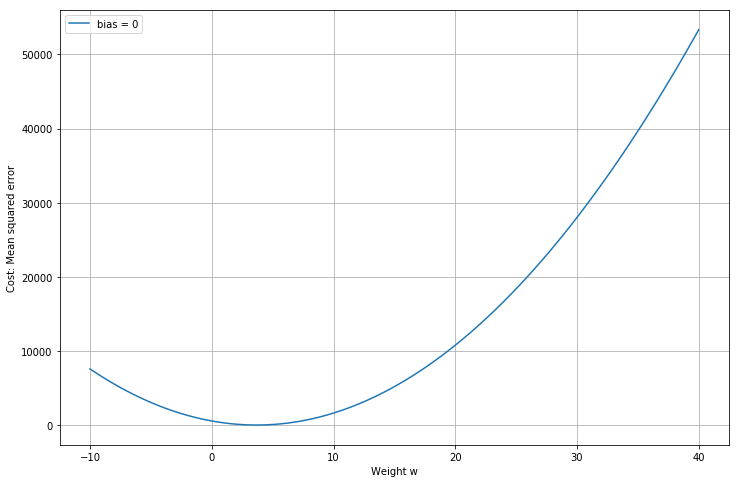

In [12]:
# Predict house prices with weights from 1 to 20 and bias = -10, 0, 10
ws = np.linspace(-10,40,100)
for b in [0]: #[-20, -10, 0, 10, 30]:
    errs = []
    for w in ws:
        errs.append(mean_squared_error(y_train, predict(x_train, w, b)))
    # Visualise error function
    pylab.plot(ws, errs)
#pylab.legend(['bias = -20', 'bias = -10', 'bias = 0', 'bias = 10', 'bias = 20'])
pylab.legend(['bias = 0'])
pylab.grid()
pylab.xlabel('Weight w')
pylab.ylabel('Cost: Mean squared error')

#  Linear regression (from SciKit-Learn)

## Train

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(x_train.shape)

(404,)


In [14]:
clf = LinearRegression()

In [15]:
clf.fit(x_train.reshape(-1,1), y_train)

/Users/tkin/wrk/analytics_weekly/ml-crash-course/mlenv/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
w = clf.coef_
b = clf.intercept_

## Evaluate model

In [17]:
train_error = mean_squared_error(y_train, clf.predict(x_train.reshape(-1,1)))
test_error = mean_squared_error(y_test, clf.predict(x_test.reshape(-1,1)))
print('Train error=%f test error=%f' % (train_error, test_error))

Train error=42.996616 test error=46.144775


### Visualise results

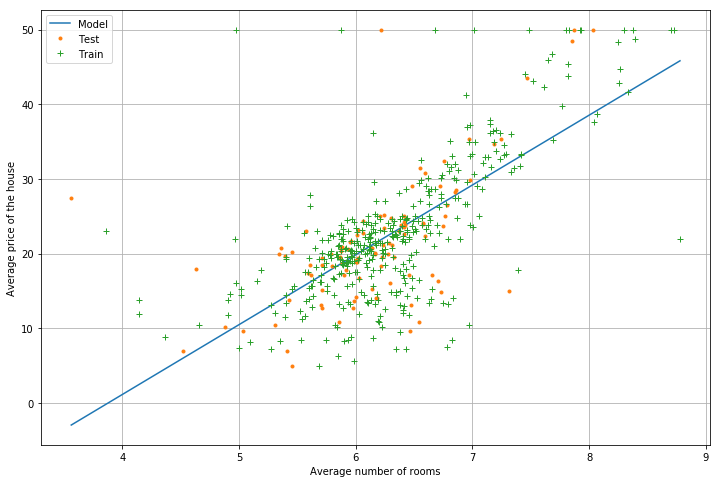

In [18]:
pylab.figure()

# Generate data to visualise model
xs = np.linspace(X.min(), X.max(), 100)

# Plot stuff
pylab.plot(xs, clf.predict(xs.reshape(-1, 1)))
pylab.plot(x_test, y_test, '.')
pylab.plot(x_train, y_train, '+')

# Configure figure axes etc
pylab.xlabel('Average number of rooms')
pylab.ylabel('Average price of the house')
pylab.legend(['Model', 'Test', 'Train'])
pylab.grid()

# Bonus: Linear regression with Keras

## Load data

In [19]:
from sklearn.datasets import load_boston

# Load data
boston = load_boston()

# Choose AVG number of rooms as feature
X = boston.data[:, boston.feature_names.tolist().index('RM')]

# Target / desired output
y = boston.target

(506,)
(506,)


## Define a model (Linear Regression)

In [20]:
# It is a good idea to clear the session (remove graphs etc from GPU/CPU) before defining a new model
K.clear_session()

# Init new feedforward network model from keras
model = Sequential()

# In linear regression we don't have hidden layers. Just the output which is connected to input.
model.add(Dense(1, activation='linear', input_shape=(1,)))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


## Define loss/cost function and optimizer and compile network

In [21]:
model.compile(loss='mean_squared_error',
              optimizer=RMSprop(lr=.1))

## Train the model

In [22]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((404,), (404,), (102,), (102,))

In [24]:
history = model.fit(x_train, y_train,
                    batch_size=32,
                    epochs=1000,
                    verbose=0)

## Evaluate the model

In [25]:
train_error = mean_squared_error(y_train, model.predict(x_train, verbose=0))
test_error = mean_squared_error(y_test, model.predict(x_test, verbose=0))
print('Train error=%f test error=%f' % (train_error, test_error))

Train error=43.002417 test error=46.160109


### Visualise results

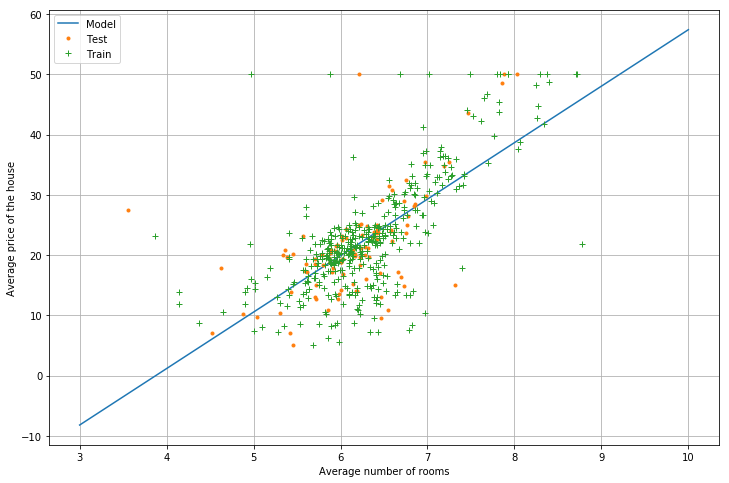

In [26]:
pylab.figure()
xs = np.linspace(3, 10, 20)
pylab.plot(xs, model.predict(xs.reshape(-1, 1)))
pylab.plot(x_test, y_test, '.')
pylab.plot(x_train, y_train, '+')
pylab.legend(['Model', 'Test', 'Train'])
pylab.xlabel('Average number of rooms')
pylab.ylabel('Average price of the house')
pylab.grid()

# Exercise 1.2 Non-linear regression
Here we use non-linear functions to predict house prices instead of a linear function.

#### Load data

In [58]:
# Load data
boston = load_boston()

# Choose AVG number of rooms as feature
X = boston.data[:, boston.feature_names.tolist().index('RM')]

# Target / desired output
y = boston.target

#### Visualise

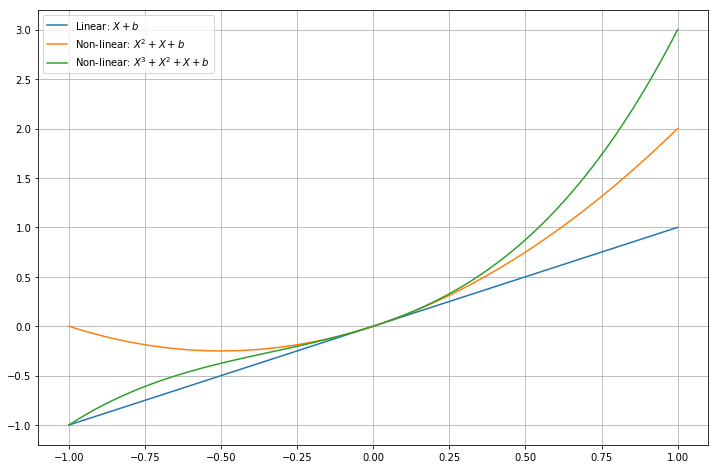

In [59]:
# Plotting linear and two non-linear functions
xs = np.linspace(-1,1,100)
bias = 0
y1 = xs + bias
y2 = np.power(xs, 2) + xs + bias
y3 = np.power(xs, 3) + np.power(xs, 2) + xs + bias

pylab.plot(xs, y1)
pylab.plot(xs, y2)
pylab.plot(xs, y3)
pylab.grid()
pylab.legend(['Linear: $X + b$', 'Non-linear: $X^2+X+b$', 'Non-linear: $X^3+X^2+X+b$'])
pylab.savefig('non-linear-functions.png')

In [60]:
# A function that generates polynomial features
def gen_features(x, n=3):
    x_out = []
    for i in range(1, n+1):
        x_out.append(x.reshape(-1, 1)**i)
    
    return np.hstack(x_out)

#### Train models with higher degree polynomial features

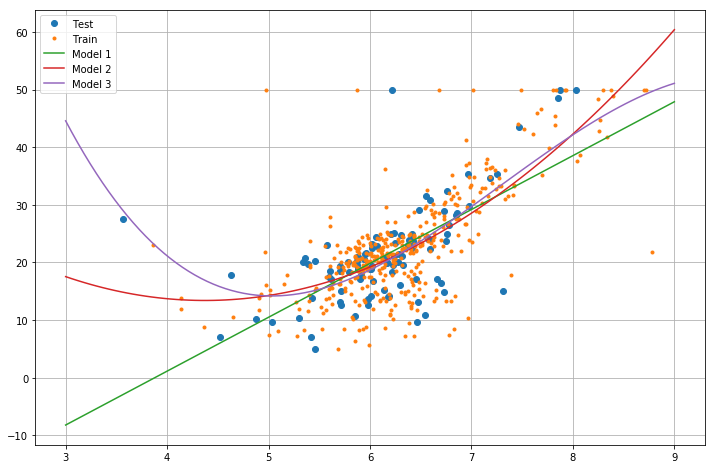

In [62]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pylab.plot(x_test, y_test, 'o')
pylab.plot(x_train, y_train, '.')

for p in range(1, 4):
    # Gen data
    x_train_tmp = gen_features(x_train, p)
    x_test_tmp = gen_features(x_test, p)
    
    # Train a model
    clf.fit(x_train_tmp, y_train)
    
    # Plot
    xs = np.linspace(3,9,100).reshape(-1,1)
    xs = gen_features(xs, p)
    pred = clf.predict(xs)
    pylab.plot(np.linspace(3, 9, 100), pred)

pylab.legend(['Test', 'Train', 'Model 1', 'Model 2', 'Model 3'])
pylab.grid()

### Bonus: Train a model using Keras

In [74]:
# Lets generate some features

x_train2 = gen_features(x_train, 2)
x_test2 = gen_features(x_test, 2)

x_train3 = gen_features(x_train, 3)
x_test3 = gen_features(x_test, 3)

x_train5 = gen_features(x_train, 5)
x_test5 = gen_features(x_test, 5)

In [75]:
# It is a good idea to clear the session (remove graphs etc from GPU/CPU) before defining a new model
K.clear_session()

# Init new feedforward network model from keras
model = Sequential()

# In linear regression we don't have hidden layers. Just the output which is connected to input.
model.add(Dense(1, activation='linear', input_shape=(x_train2.shape[1],)))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [76]:
model.compile(loss='mean_squared_error',
              optimizer=RMSprop(lr=0.1))

In [77]:
history = model.fit(x_train2, y_train,
                    batch_size=32,
                    epochs=100,
                    verbose=0)

In [78]:
train_error = mean_squared_error(y_train, model.predict(x_train2, verbose=0))
test_error = mean_squared_error(y_test, model.predict(x_test2, verbose=0))
print('Train error=%f test error=%f' % (train_error, test_error))

Train error=43.347441 test error=42.873211


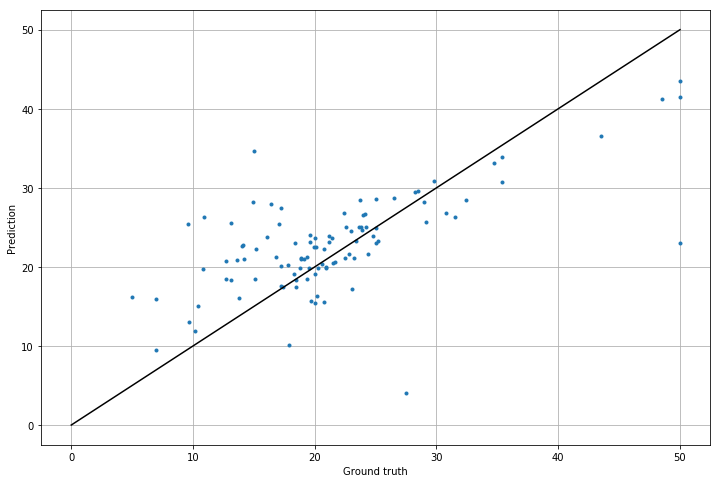

In [80]:
y_test_pred = model.predict(x_test2, verbose=0)
pylab.plot(y_test, y_test_pred, '.')
pylab.plot([0,50],[0,50],'k-')
pylab.xlabel('Ground truth')
pylab.ylabel('Prediction')
pylab.grid()

# Exercise 1.3 Multivariate regression

#### Tasks:
* Choose features

### Load data

In [36]:
from sklearn.datasets import load_boston

# Load data
boston = load_boston()

# Choose AVG number of rooms as feature
X = boston.data

# Target / desired output
y = boston.target

#### Visualise data

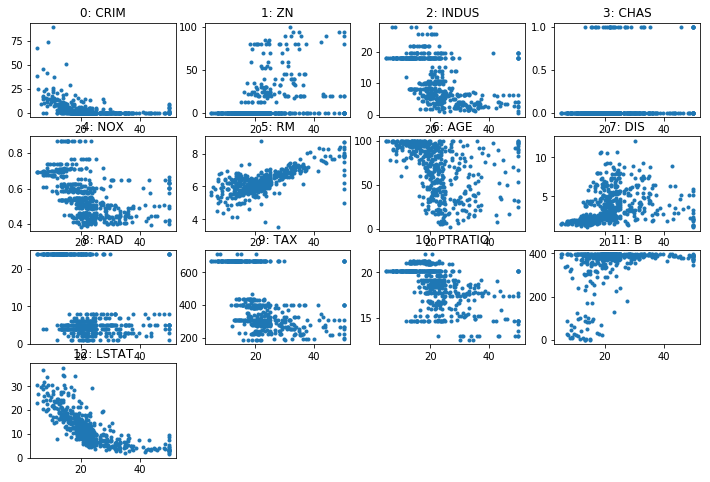

In [37]:
for i in range(0, X.shape[1]):
    pylab.subplot(4, 4, i+1)
    pylab.plot(y, X[:, i], '.')
    pylab.title(str(i) + ': ' + boston.feature_names.tolist()[i])

### Select features

In [38]:
Xtmp = X[:, [0, 5]]
# TODO: You can try these
# Xtmp = X[:, [0, 1, 2]]
# Xtmp = X[:, [0, 6, 4]]
# Xtmp = X[:, [0, 5, 12]]

### Train a model

In [39]:
# Split data
x_train, x_test, y_train, y_test = train_test_split(Xtmp, y, test_size=0.2, random_state=42)
# Train
clf.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [40]:
train_error = mean_squared_error(y_train, clf.predict(x_train))
test_error = mean_squared_error(y_test, clf.predict(x_test))
print('Train error=%f test error=%f' % (train_error, test_error))

Train error=38.031140 test error=42.007928


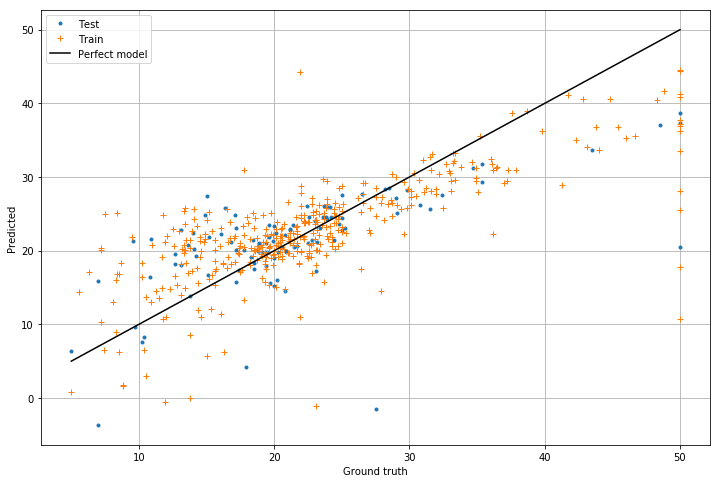

In [41]:
pylab.figure()
pylab.plot(y_test, clf.predict(x_test), '.')
pylab.plot(y_train, clf.predict(x_train), '+')
pylab.plot([np.min(y_test), np.max(y_test)], [np.min(y_test), np.max(y_test)], 'k-')
pylab.legend(['Test', 'Train', 'Perfect model'])
pylab.xlabel('Ground truth')
pylab.ylabel('Predicted')
pylab.grid()

### Bonus: Keras model

In [42]:
# It is a good idea to clear the session (remove graphs etc from GPU/CPU) before defining a new model
K.clear_session()

# Init new feedforward network model from keras
model = Sequential()

# Input layer connected a layer with 1 output nodes
model.add(Dense(1, activation='linear', input_shape=(x_train.shape[1],)))

model.summary()

model.compile(loss='mean_squared_error',
              optimizer=RMSprop(lr=0.1))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [43]:
history = model.fit(x_train, y_train,
                    batch_size=32,
                    epochs=100,
                    verbose=0)

In [44]:
train_error = mean_squared_error(y_train, model.predict(x_train, verbose=0))
test_error = mean_squared_error(y_test, model.predict(x_test, verbose=0))
print('Train error=%f test error=%f' % (train_error, test_error))

Train error=40.704479 test error=40.943075


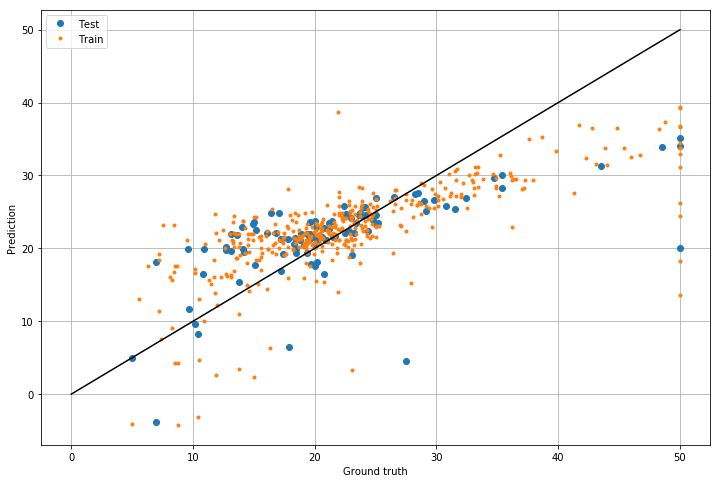

In [45]:
y_test_pred = model.predict(x_test, verbose=0)
pylab.plot(y_test, y_test_pred, 'o')
y_train_pred = model.predict(x_train, verbose=0)
pylab.plot(y_train, y_train_pred, '.')
pylab.plot([0,50],[0,50],'k-')
pylab.xlabel('Ground truth')
pylab.ylabel('Prediction')
pylab.grid()
pylab.legend(['Test', 'Train'])

# Exercise 1.4 Neural network

## Load data

In [46]:
from sklearn.datasets import load_boston

# Load data
boston = load_boston()

# Choose AVG number of rooms as feature
X = boston.data

# Target / desired output
y = boston.target

print(X.shape)
print(y.shape)

(506, 13)
(506,)


In [47]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Define a model

In [48]:
# It is a good idea to clear the session (remove graphs etc from GPU/CPU) before defining a new model
K.clear_session()

# Init new feedforward network model from keras
model = Sequential()

# Input layer connected a hidden layer with 8 nodes
model.add(Dense(2, activation='linear', input_shape=(x_train.shape[1],)))

# You can add more layers like this:
# model.add(Dense(8, activation='linear'))

model.add(Dense(1, activation='linear', input_shape=(1,)))

model.summary()

model.compile(loss='mean_squared_error',
              optimizer=RMSprop(lr=0.1))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 28        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


## Train a model

In [49]:
history = model.fit(x_train, y_train,
                    batch_size=32,
                    epochs=100,
                    verbose=0)

## Evaluate the model

In [50]:
train_error = mean_squared_error(y_train, model.predict(x_train, verbose=0))
test_error = mean_squared_error(y_test, model.predict(x_test, verbose=0))
print('Train error=%f test error=%f' % (train_error, test_error))

Train error=79.940269 test error=96.390988


### Visualise

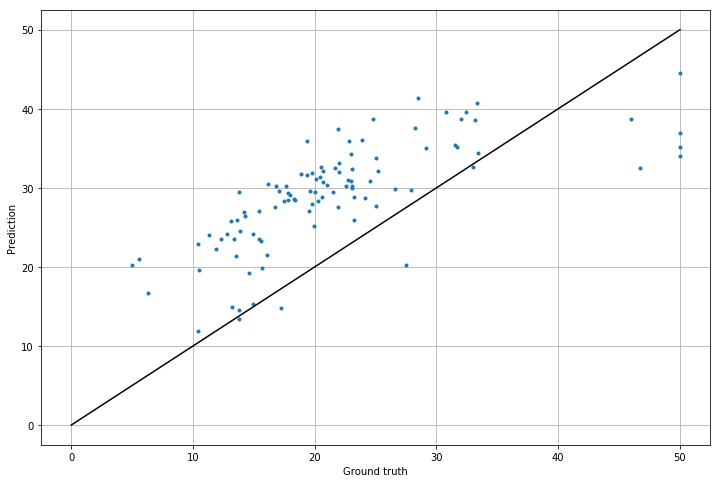

In [51]:
y_test_pred = model.predict(x_test, verbose=0)
pylab.plot(y_test, y_test_pred, '.')
pylab.plot([0,50],[0,50],'k-')
pylab.xlabel('Ground truth')
pylab.ylabel('Prediction')
pylab.grid()

### More tricks

#### Process data

In [52]:
x_scaler = MinMaxScaler().fit(x_train)
x_train = x_scaler.transform(x_train)
x_test = x_scaler.transform(x_test)

y_scaler = MinMaxScaler().fit(y_train.reshape(-1, 1))
y_train = y_scaler.transform(y_train.reshape(-1, 1))
y_test = y_scaler.transform(y_test.reshape(-1, 1))

#### Define (the same) Model

In [53]:
# It is a good idea to clear the session (remove graphs etc from GPU/CPU) before defining a new model
K.clear_session()

# Init new feedforward network model from keras
model = Sequential()

# Input layer connected a layer with 2 nodes
model.add(Dense(2, activation='linear', input_shape=(x_train.shape[1],)))

model.add(Dense(1, activation='linear', input_shape=(1,)))

model.summary()

model.compile(loss='mean_squared_error',
              optimizer=RMSprop(lr=.1))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 28        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


#### Train a model

In [54]:
history = model.fit(x_train, y_train,
                    batch_size=256,
                    epochs=1000,
                    verbose=0)

#### Evaluate

In [55]:
train_error = mean_squared_error(y_scaler.inverse_transform(y_train),
                                 y_scaler.inverse_transform(model.predict(x_train, verbose=0)))
test_error = mean_squared_error(y_scaler.inverse_transform(y_test),
                                y_scaler.inverse_transform(model.predict(x_test, verbose=0)))
print('Train error=%f test error=%f' % (train_error, test_error))

Train error=21.844554 test error=26.460491


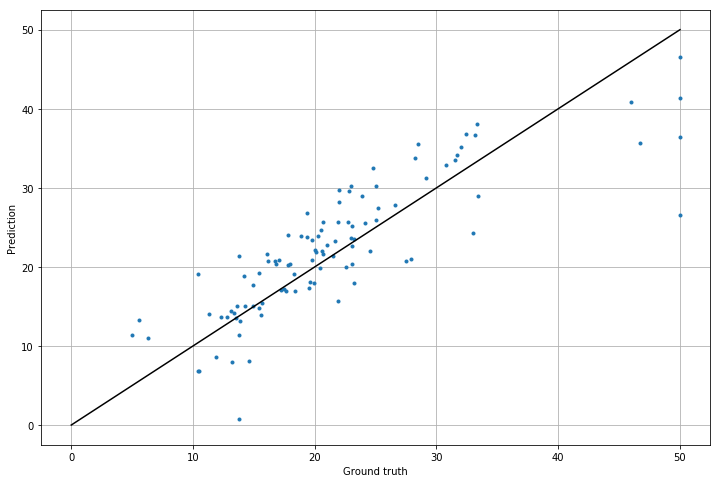

In [56]:
y_test_pred = model.predict(x_test, verbose=0)
pylab.plot(y_scaler.inverse_transform(y_test), y_scaler.inverse_transform(y_test_pred), '.')
pylab.plot([0,50],[0,50],'k-')
pylab.xlabel('Ground truth')
pylab.ylabel('Prediction')
pylab.grid()